# Img Src

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'landslide4sense:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4160916%2F7194910%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240127%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240127T171356Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D74a8176204b528e2e32068176d9800fd803cd745606098524e3af174303e10f2434d64f3aea7e2f12de710a1036f1f36a85aa54735fcac31cdb2500a4521561a02bd531dac688d29585361c7fde92ddf116892ebc6d6a7845669acb1bdfb0a30e978976c3634065af7be38af453010c8a8c3e40abf17e6cf2cd870b6edb58cb7c90dfcb3a8c8db12e9aeea7c53e664a2ef4c11464a17ff526738df747b1291694c199bcdef3cc3a615127e31505778c9f6dc17344d8c3c2d5cca426a1d1c7f8eaf9d3f66190b680c2a7a9158f4347fa6144a02f9ea0d22c6e365fcb2b177eedaeddd79c25bdf64c64382356fa911f7af9c0d757bf0ca46ee8f048811859257ea'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 3057931607 bytes downloaded
Downloaded and uncompressed: landslide4sense
Data source import complete.


In [3]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/landslide4sense/TrainData/mask/mask_2062.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2232.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2304.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_3072.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_309.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2559.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2330.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_700.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1751.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1233.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_699.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2699.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1746.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_454.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2428.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1464.h5
/kaggle/input/landslide4s

# Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
import h5py
import glob

# Data Checking

In [7]:
hdf5_filepath = '/kaggle/input/landslide4sense/TrainData/img/image_2410.h5'

# Open the HDF5 file
with h5py.File(hdf5_filepath, 'r') as file:
    # Print keys (datasets or groups) in the HDF5 file
    print("Keys in HDF5 file:", list(file.keys()))

    # Optionally, you can print information about specific datasets
    for key in file.keys():
        dataset = file[key]
        print(f"Dataset '{key}':")
        print("  Shape:", dataset.shape)
        print("  Dtype:", dataset.dtype)
        # Add more information as needed

Keys in HDF5 file: ['img']
Dataset 'img':
  Shape: (128, 128, 14)
  Dtype: float64


In [8]:
# Testing the dataset
path_single = r"/kaggle/input/landslide4sense/TrainData/img/image_2000.h5"
path_single_mask = r'/kaggle/input/landslide4sense/TrainData/mask/mask_2000.h5'

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


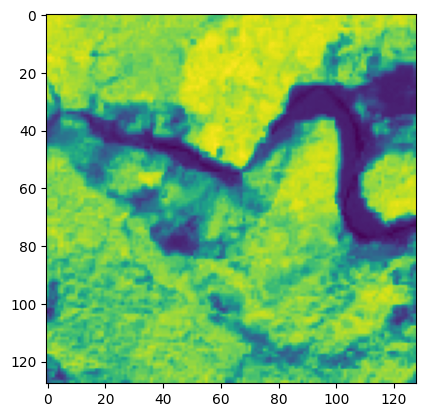

In [9]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])

    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

In [10]:
data_ndvi.shape

(128, 128)

ls ['mask']
input data shape: (128, 128)


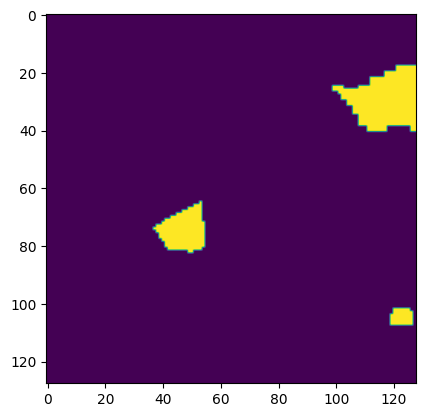

In [11]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

# Importing All Training Data

In [12]:
path_single = r"/kaggle/input/landslide4sense/TrainData/img/image_10.h5"
path_single_mask = r'/kaggle/input/landslide4sense/TrainData/mask/mask_1.h5'
TRAIN_PATH = r"/kaggle/input/landslide4sense/TrainData/img/*.h5"
TRAIN_MASK = r'/kaggle/input/landslide4sense/TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

# Normalization

In [13]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION


    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data

0 /kaggle/input/landslide4sense/TrainData/img/image_1.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1.h5
1 /kaggle/input/landslide4sense/TrainData/img/image_10.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_10.h5
2 /kaggle/input/landslide4sense/TrainData/img/image_100.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_100.h5
3 /kaggle/input/landslide4sense/TrainData/img/image_1000.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1000.h5
4 /kaggle/input/landslide4sense/TrainData/img/image_1001.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1001.h5
5 /kaggle/input/landslide4sense/TrainData/img/image_1002.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1002.h5
6 /kaggle/input/landslide4sense/TrainData/img/image_1003.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1003.h5
7 /kaggle/input/landslide4sense/TrainData/img/image_1004.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1004.h5
8 /kaggle/input/landslide4sense/TrainData/img/image_1005.h5 /kaggle/

<ipython-input-13-b831676fb87b>:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1682 /kaggle/input/landslide4sense/TrainData/img/image_2512.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2512.h5
1683 /kaggle/input/landslide4sense/TrainData/img/image_2513.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2513.h5
1684 /kaggle/input/landslide4sense/TrainData/img/image_2514.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2514.h5
1685 /kaggle/input/landslide4sense/TrainData/img/image_2515.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2515.h5
1686 /kaggle/input/landslide4sense/TrainData/img/image_2516.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2516.h5
1687 /kaggle/input/landslide4sense/TrainData/img/image_2517.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2517.h5
1688 /kaggle/input/landslide4sense/TrainData/img/image_2518.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2518.h5
1689 /kaggle/input/landslide4sense/TrainData/img/image_2519.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2519.h5
1690 /kaggle/input/landslide4sen

<ipython-input-13-b831676fb87b>:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


 /kaggle/input/landslide4sense/TrainData/img/image_304.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_304.h5
2269 /kaggle/input/landslide4sense/TrainData/img/image_3040.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3040.h5
2270 /kaggle/input/landslide4sense/TrainData/img/image_3041.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3041.h5
2271 /kaggle/input/landslide4sense/TrainData/img/image_3042.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3042.h5
2272 /kaggle/input/landslide4sense/TrainData/img/image_3043.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3043.h5
2273 /kaggle/input/landslide4sense/TrainData/img/image_3044.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3044.h5
2274 /kaggle/input/landslide4sense/TrainData/img/image_3045.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3045.h5
2275 /kaggle/input/landslide4sense/TrainData/img/image_3046.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3046.h5
2276 /kaggle/input/landslide4sense/Tra

In [14]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


# Dice Loss

In [15]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

# Visualization of different channel

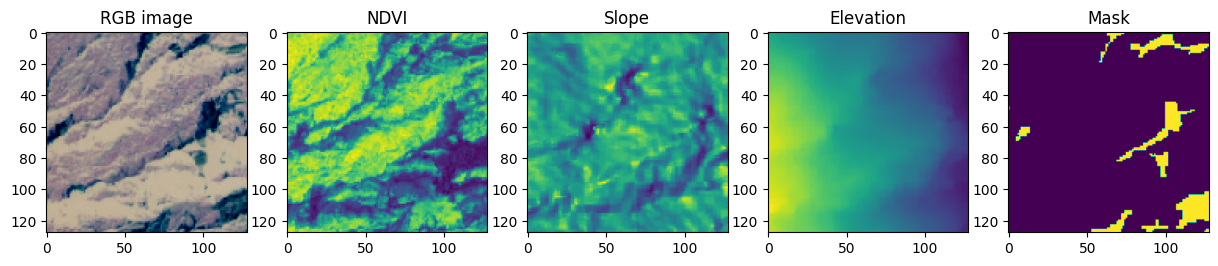

In [16]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

# Spliting

In [17]:
x_train, x_valid, y_train, y_valid = tts(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

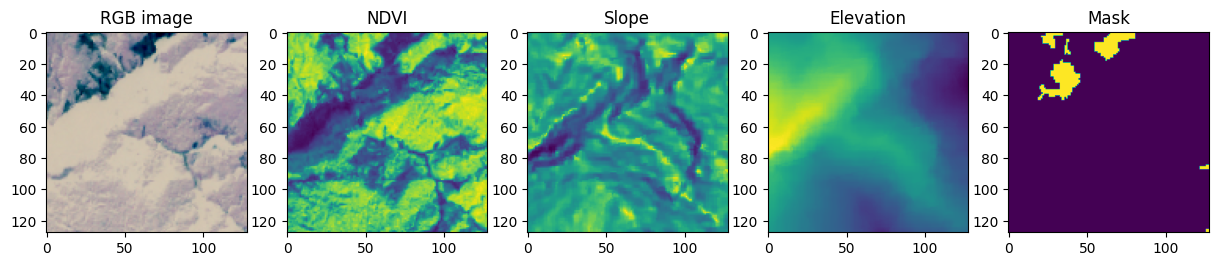

In [18]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [19]:
x_train.shape, y_valid.shape

((3039, 128, 128, 6), (760, 128, 128, 1))

In [20]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

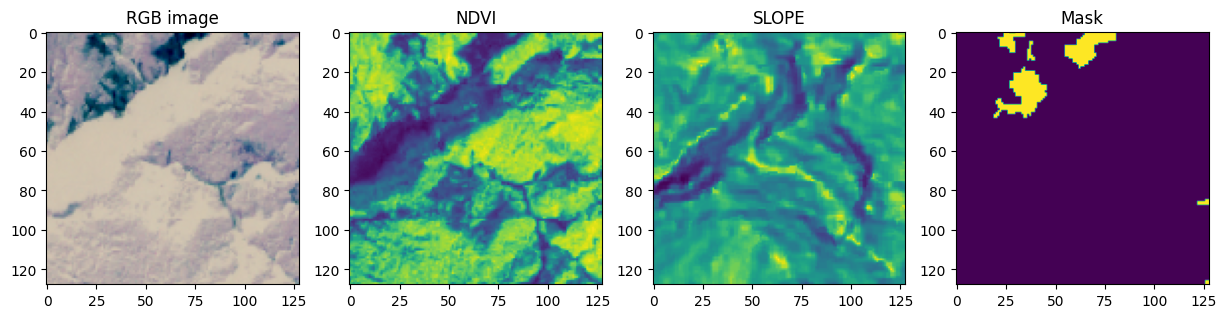

In [21]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

#Model Training(UNet)

In [22]:
from tensorflow.keras import backend as K

# Define precision metric
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# Define recall metric
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [28]:
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision_m, recall_m,f1_m])

    return model

In [29]:
model = unet_model(128, 128, 6)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 6)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 16)         880       ['input_2[0][0]']             
                                                                                                  
 dropout_9 (Dropout)         (None, 128, 128, 16)         0         ['conv2d_19[0][0]']           
                                                                                                  
 conv2d_20 (Conv2D)          (None, 128, 128, 16)         2320      ['dropout_9[0][0]']           
                                                                                            

In [26]:
def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [23]:
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, verbose=1, mode='max')

callbacks = [
    earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=32,
          epochs=100,
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("LandSlide_UNet.h5")

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.98170, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


95/95 - 36s - loss: 0.0997 - accuracy: 0.9761 - precision_m: 0.3204 - recall_m: 0.0261 - val_loss: 0.0495 - val_accuracy: 0.9817 - val_precision_m: 0.7115 - val_recall_m: 0.2630 - 36s/epoch - 381ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.98170 to 0.98366, saving model to best_model.h5
95/95 - 9s - loss: 0.0510 - accuracy: 0.9806 - precision_m: 0.6783 - recall_m: 0.3596 - val_loss: 0.0450 - val_accuracy: 0.9837 - val_precision_m: 0.6641 - val_recall_m: 0.4869 - 9s/epoch - 97ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.98366
95/95 - 9s - loss: 0.0456 - accuracy: 0.9829 - precision_m: 0.6837 - recall_m: 0.5315 - val_loss: 0.0453 - val_accuracy: 0.9820 - val_precision_m: 0.5598 - val_recall_m: 0.6969 - 9s/epoch - 96ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.98366 to 0.98510, saving model to best_model.h5
95/95 - 9s - loss: 0.0421 - accuracy: 0.9843 - precision_m: 0.7140 - recall_m: 0.5743 - val_loss: 0.0399 - val_accuracy: 0.9851 - val_p

In [30]:
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model1.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=32,
          epochs=100,
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("LandSlide_UNet1.h5")

Epoch 1/100

Epoch 1: val_f1_m improved from -inf to 0.00000, saving model to best_model1.h5
95/95 - 19s - loss: 0.1436 - accuracy: 0.9414 - precision_m: 0.0358 - recall_m: 0.0380 - f1_m: 0.0044 - val_loss: 0.0586 - val_accuracy: 0.9756 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00 - 19s/epoch - 204ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_f1_m improved from 0.00000 to 0.59601, saving model to best_model1.h5
95/95 - 9s - loss: 0.0499 - accuracy: 0.9799 - precision_m: 0.6999 - recall_m: 0.2190 - f1_m: 0.2752 - val_loss: 0.0448 - val_accuracy: 0.9831 - val_precision_m: 0.7051 - val_recall_m: 0.5228 - val_f1_m: 0.5960 - 9s/epoch - 100ms/step
Epoch 3/100

Epoch 3: val_f1_m improved from 0.59601 to 0.60822, saving model to best_model1.h5
95/95 - 9s - loss: 0.0434 - accuracy: 0.9836 - precision_m: 0.6999 - recall_m: 0.5213 - f1_m: 0.5854 - val_loss: 0.0414 - val_accuracy: 0.9842 - val_precision_m: 0.7545 - val_recall_m: 0.5159 - val_f1_m: 0.6082 - 9s/epoch - 98ms/step
Epoch 4/100

Epoch 4: val_f1_m improved from 0.60822 to 0.64386, saving model to best_model1.h5
95/95 - 9s - loss: 0.0409 - accuracy: 0.9845 - precision_m: 0.7379 - recall_m: 0.5099 - f1_m: 0.5922 - val_loss: 0.0389 - val_accuracy: 0.9852 - val_precision_m: 0.7616 - val_recall_m: 0.5630 - val_f1_m: 0.6439 - 9s/epoch - 99ms/step
Epoch 5/100

Epoch 5:

# Prediction

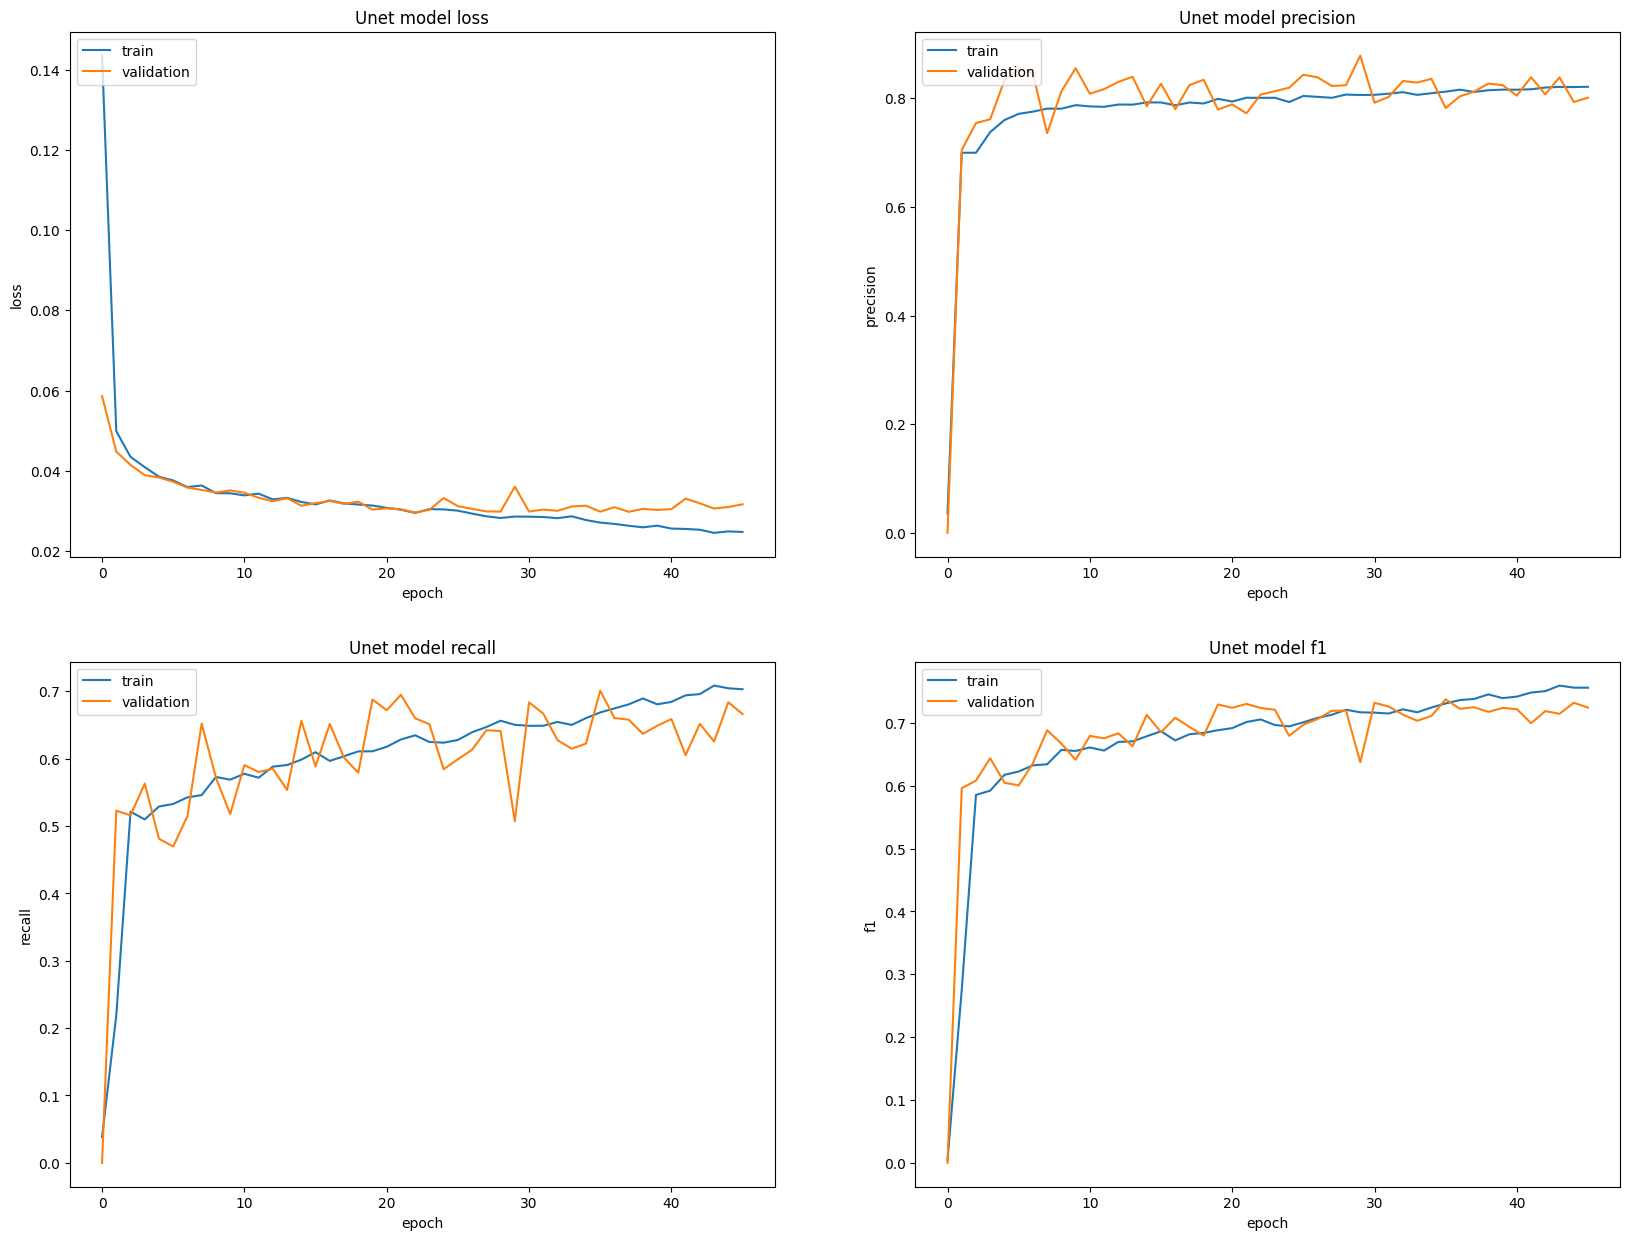

In [31]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [34]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 [==============================] - 1s 22ms/step


Text(0.5, 1.0, 'Training Image')

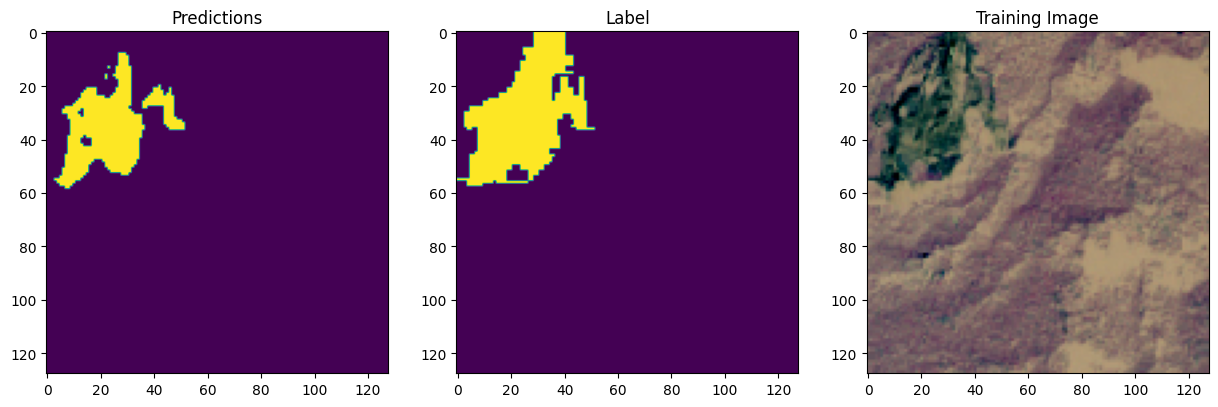

In [43]:
img = 99
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')